# Assignment
In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!




In [0]:
# imports and environment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings

In [0]:
# retrieving data
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
edu_df.info()
edu_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
edu_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

Addressing Missing Values:

I've decided to use the mean by year approach from the previous module

In [5]:
na_cols = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 
       'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G', 
       'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 
       'AVG_READING_8_SCORE']

years = edu_df['YEAR'].unique()

for col in na_cols:
  for year in years:
    edu_df.loc[edu_df["YEAR"] == year, col] = edu_df.loc[edu_df["YEAR"] == year, col].fillna(
            edu_df[edu_df["YEAR"] == year][col].mean())

edu_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          107
TOTAL_REVENUE                    51
FEDERAL_REVENUE                  51
STATE_REVENUE                    51
LOCAL_REVENUE                    51
TOTAL_EXPENDITURE                51
INSTRUCTION_EXPENDITURE          51
SUPPORT_SERVICES_EXPENDITURE     51
OTHER_EXPENDITURE               107
CAPITAL_OUTLAY_EXPENDITURE       51
GRADES_PK_G                     102
GRADES_KG_G                     102
GRADES_4_G                      102
GRADES_8_G                      102
GRADES_12_G                     102
GRADES_1_8_G                    102
GRADES_9_12_G                   102
GRADES_ALL_G                    102
AVG_MATH_4_SCORE                860
AVG_MATH_8_SCORE                860
AVG_READING_4_SCORE             860
AVG_READING_8_SCORE             860
dtype: int64

Interesting... there are still null values left. My assumption is there are whole years worth of missing values, so the mean cannot be populated. Let's verify:

In [6]:
col_count_by_year = edu_df[na_cols].groupby(edu_df['YEAR']).count()
col_count_by_year

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,,
1992,0,56,56,56,56,56,56,56,0,56,56,56,56,56,56,56,56,56,56,56,56,56
1993,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0,0,0,0
1994,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0,0,0,0
1995,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0,0,0,0
1996,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
1997,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,0,0,0,0
1998,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0,0,0,0
1999,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,0,0,0,0
2000,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [7]:
col_mean_by_year = edu_df[na_cols].groupby(edu_df['YEAR']).mean()
col_mean_by_year

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,,
1992,NaN,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,NaN,4.050078e+05,9392.888889,59942.642857,60724.875000,56872.357143,44038.767857,485748.410714,207994.392857,726734.666667,218.410116,266.360319,212.712256,263.307067
1993,802054.333333,4.768758e+06,3.086224e+05,2.209300e+06,2.250836e+06,4.788283e+06,2.540431e+06,1.419870e+06,248234.784314,4.096238e+05,10147.888889,61098.303571,61044.321429,59019.875000,43930.089286,491633.553571,212404.464286,738159.000000,NaN,NaN,NaN,NaN
1994,801383.960784,4.916678e+06,3.272233e+05,2.225664e+06,2.363790e+06,4.954213e+06,2.626080e+06,1.476894e+06,262916.705882,4.041495e+05,11207.833333,62327.464286,62184.750000,59953.285714,45072.160714,496646.464286,216987.839286,749170.222222,NaN,NaN,NaN,NaN
1995,858973.039216,5.476034e+06,3.546117e+05,2.555041e+06,2.566381e+06,5.526114e+06,2.931096e+06,1.616281e+06,295324.647059,4.765508e+05,11853.351852,64056.285714,62258.821429,60907.035714,45061.214286,502088.482143,222061.821429,760743.777778,NaN,NaN,NaN,NaN
1996,873930.607843,5.744172e+06,3.647964e+05,2.737296e+06,2.642080e+06,5.838049e+06,3.076873e+06,1.680742e+06,303516.137255,5.445423e+05,12267.854545,62963.894737,61709.245614,60714.894737,46054.245614,502958.631579,225201.280702,764874.909091,221.479509,270.182528,214.587049,261.412097
1997,888379.745098,6.115397e+06,3.869910e+05,2.940125e+06,2.788281e+06,6.193357e+06,3.245567e+06,1.762159e+06,305274.705882,6.359637e+05,12721.145455,62479.807018,62649.982456,60906.000000,47575.403509,507648.192982,228669.684211,773816.636364,NaN,NaN,NaN,NaN
1998,897509.058824,6.504525e+06,4.272517e+05,3.140750e+06,2.936523e+06,6.595780e+06,3.427786e+06,1.873964e+06,318956.098039,7.034032e+05,13093.642857,60428.379310,63126.655172,61054.206897,47627.310345,504449.672414,227326.982759,769850.535714,NaN,NaN,NaN,NaN
1999,905101.470588,6.954543e+06,4.747857e+05,3.390289e+06,3.089468e+06,7.068126e+06,3.633184e+06,1.999630e+06,334733.431373,7.937301e+05,13560.625000,59697.379310,64770.827586,61356.137931,48705.620690,508090.155172,230605.482759,777501.660714,NaN,NaN,NaN,NaN
2000,910446.705882,7.443181e+06,5.229861e+05,3.650809e+06,3.269385e+06,7.572106e+06,3.883017e+06,2.136325e+06,352342.941176,8.755735e+05,14016.500000,59326.000000,64045.983051,61031.152542,48223.338983,504013.627119,229663.101695,784420.321429,224.803526,273.028605,217.612609,262.687292


Yes, here we can see there are multiple variables that have 0 observations in a given year. Since our main two variables for this analysis are TOTAL_REVENUE and TOTAL_EXPENDITURE, I will do the following: 
1. drop 2017 entirely as it has no financial data
2. 2016 is missing all GRADES data, which I will fill in with each column mean
4. ENROLL and OTHER EXPENDATURE missing 1992 data, which i will fill with 1993 mean.
3. It looks like AVG_MATH and AVG_READING scores were not collected for multiple years. As these are already averages, I will impute the mean of the column 




In [8]:
# 1. Dropping 2017
edu_df = edu_df[edu_df.YEAR != 2017]
edu_df.YEAR.unique()

array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015])

In [0]:
# 2.  Filling in 2016 column mean for GRADES
grade_cols = ['GRADES_PK_G',	'GRADES_KG_G',	'GRADES_4_G',	'GRADES_8_G',	'GRADES_12_G',	'GRADES_1_8_G',	'GRADES_9_12_G', 'GRADES_ALL_G']

for col in grade_cols:
  edu_df[col].fillna(edu_df[col].mean(), inplace=True)

In [0]:
# 3. Filling 1992 ENROLL and OTHER EXPENDITURE data with 1993 mean
edu_1993 = edu_df[edu_df['YEAR']==1993]

edu_df['ENROLL'].fillna(edu_1993['ENROLL'].mean(), inplace=True)
edu_df['OTHER_EXPENDITURE'].fillna(edu_1993['OTHER_EXPENDITURE'].mean(), inplace=True)

In [0]:
# 4. Impute AVG_MATHs and AVG_READINGs columns means
avg_cols = ['AVG_MATH_4_SCORE',	'AVG_MATH_8_SCORE',	'AVG_READING_4_SCORE',	'AVG_READING_8_SCORE']

for col in avg_cols:
  edu_df[col].fillna(edu_df[col].mean(), inplace=True)

In [12]:
edu_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

All nulls have been taken care of

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

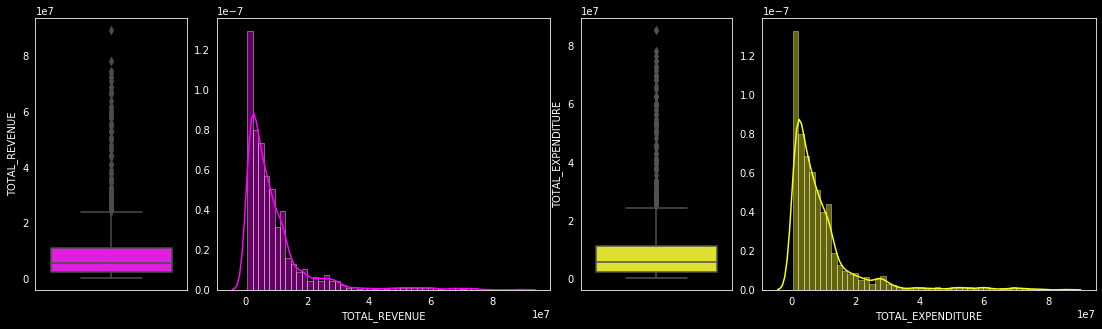

In [13]:
sns.set_style('dark')
plt.style.use('dark_background')

plt.figure(figsize=(19,5))

plt.subplot2grid((1,6), (0,0))
sns.boxplot(y='TOTAL_REVENUE', data=edu_df, color='magenta')
plt.subplot2grid((1,6), (0,3))
sns.boxplot(y='TOTAL_EXPENDITURE', data=edu_df, color='#fbff12',)
plt.subplot2grid((1,6), (0,1),colspan=2)
sns.distplot(edu_df['TOTAL_REVENUE'], color='magenta')
plt.subplot2grid((1,6), (0,4), colspan=2)
sns.distplot(edu_df['TOTAL_EXPENDITURE'], color='#fbff12');

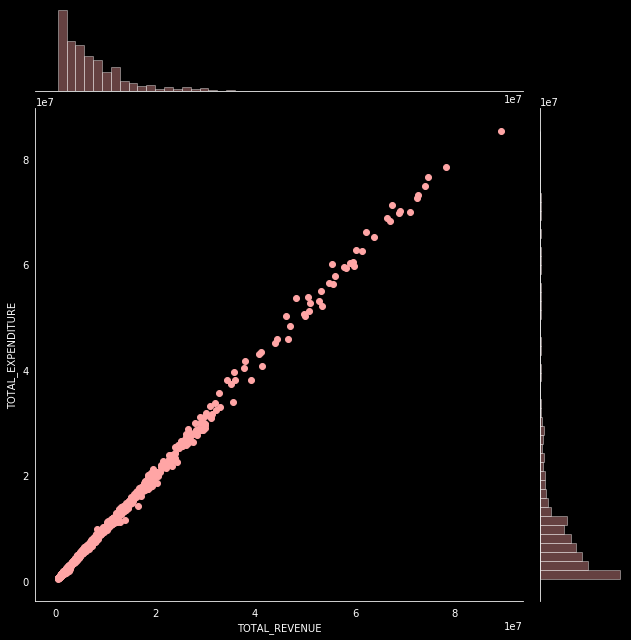

In [14]:
sns.jointplot('TOTAL_REVENUE', 'TOTAL_EXPENDITURE', data=edu_df, color='#FFA5A5',height=9);

By the graphs, yes there do appear to be outliers. Let's use Tukey's method to see how many:

In [15]:
def tukeys_IQR(col):
  q25,q75 = np.percentile(col, [25,75])
  iqr = q75-q25

  for threshold in np.arange(1,5,0.5):
    min_val = q25 - (threshold*iqr)
    max_val = q75 +(threshold*iqr)
    print(f'The threshold is {threshold}')
    print(f'The number of outliers is {len(np.where((col > max_val)|(col < min_val))[0])}')
    print('-'*29)

print('TOTAL REVENUE Outliers:')
tukeys_IQR(edu_df['TOTAL_REVENUE'])
print('\nTOTAL EXPENDITURE Outliers:')
tukeys_IQR(edu_df['TOTAL_EXPENDITURE'])

TOTAL REVENUE Outliers:
The threshold is 1.0
The number of outliers is 138
-----------------------------
The threshold is 1.5
The number of outliers is 105
-----------------------------
The threshold is 2.0
The number of outliers is 70
-----------------------------
The threshold is 2.5
The number of outliers is 50
-----------------------------
The threshold is 3.0
The number of outliers is 45
-----------------------------
The threshold is 3.5
The number of outliers is 39
-----------------------------
The threshold is 4.0
The number of outliers is 37
-----------------------------
The threshold is 4.5
The number of outliers is 31
-----------------------------

TOTAL EXPENDITURE Outliers:
The threshold is 1.0
The number of outliers is 146
-----------------------------
The threshold is 1.5
The number of outliers is 106
-----------------------------
The threshold is 2.0
The number of outliers is 71
-----------------------------
The threshold is 2.5
The number of outliers is 54
-------------

### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.


I will be winsorizing the data. Based on the visualizations, I will be performing a one-way Winsorization on the highest observations

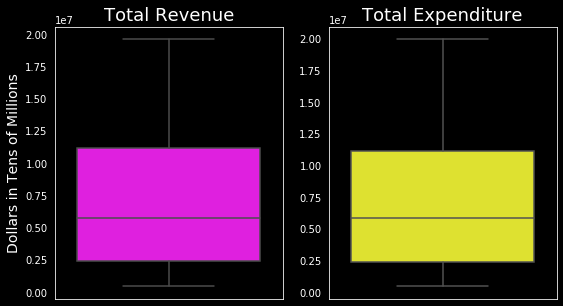

In [16]:
# creating a smaller df of the needed columns as I will need the outliers in the next question
tot_exp_rev = edu_df[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]

winsorize_exp = winsorize(tot_exp_rev['TOTAL_EXPENDITURE'], (0,0.10), inplace=True)
winsorize_rev = winsorize(tot_exp_rev['TOTAL_REVENUE'], (0,0.10), inplace=True)

plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
sns.boxplot(y=winsorize_rev, color='magenta')
plt.title('Total Revenue', fontsize=18)
plt.ylabel('Dollars in Tens of Millions', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(y=winsorize_exp, color='#fbff12');
plt.title('Total Expenditure', fontsize=18);

All outliers have been handled

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


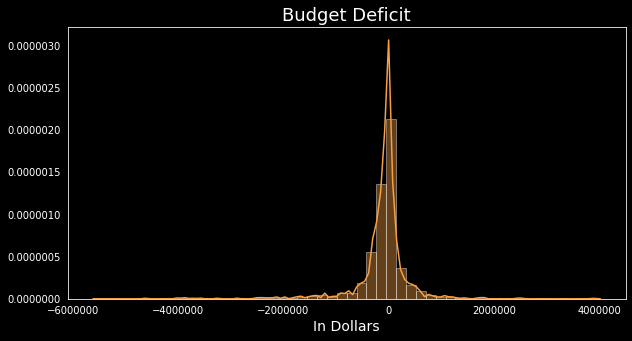

In [26]:
plt.figure(figsize=(10,5))

edu_df['BUDGET_DEFICIT'] = edu_df['TOTAL_REVENUE'] - edu_df['TOTAL_EXPENDITURE']

sns.distplot(edu_df['BUDGET_DEFICIT'], color='#fa9f42');
plt.title('Budget Deficit', fontsize=18)
plt.xlabel('In Dollars', fontsize=14);

It appears as though there are quite a few outliers on both ends of the spectrum

In [18]:
def tukeys_IQR(col):
  q25,q75 = np.percentile(col, [25,75])
  iqr = q75-q25

  for threshold in np.arange(1,5,0.5):
    min_val = q25 - (threshold*iqr)
    max_val = q75 +(threshold*iqr)
    print(f'The threshold is {threshold}')
    print(f'The number of outliers is {len(np.where((col > max_val)|(col < min_val))[0])}')
    print('-'*29)

print('BUDGET DEFICIT Outliers:')
tukeys_IQR(edu_df['BUDGET_DEFICIT'])

BUDGET DEFICIT Outliers:
The threshold is 1.0
The number of outliers is 270
-----------------------------
The threshold is 1.5
The number of outliers is 202
-----------------------------
The threshold is 2.0
The number of outliers is 151
-----------------------------
The threshold is 2.5
The number of outliers is 120
-----------------------------
The threshold is 3.0
The number of outliers is 102
-----------------------------
The threshold is 3.5
The number of outliers is 83
-----------------------------
The threshold is 4.0
The number of outliers is 76
-----------------------------
The threshold is 4.5
The number of outliers is 66
-----------------------------


Let's also approach these in a similar way with a two-way winsorization

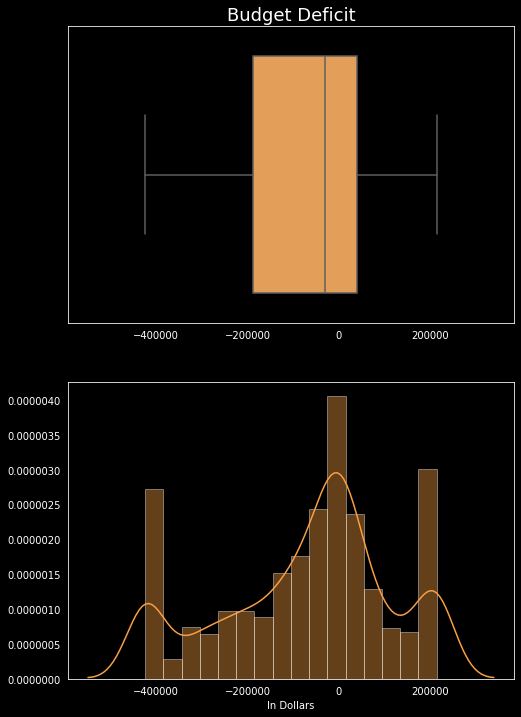

In [27]:
edu_df['winsorize_bud_def'] = winsorize(edu_df['BUDGET_DEFICIT'], (0.10,0.10))

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
ax = sns.boxplot(x=edu_df['winsorize_bud_def'], color='#fa9f42')
plt.title('Budget Deficit', fontsize=18)
plt.xticks(ticks=None, labels=None)
plt.xlabel('')

plt.subplot(2,1,2, sharex=ax)
sns.distplot(edu_df['winsorize_bud_def'], color='#fa9f42')
plt.xlabel('In Dollars');


Outliers have been elimiated

### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.


In [20]:
tot_exp_rev['BUDGET_DEFICIT']= winsorize_rev - winsorize_exp

tot_exp_rev.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE,BUDGET_DEFICIT
0,2678885.0,2653798.0,25087.0
1,1049591.0,972488.0,77103.0
2,3258079.0,3401580.0,-143501.0
3,1711959.0,1743022.0,-31063.0
4,19616665.0,19992550.0,-375885.0


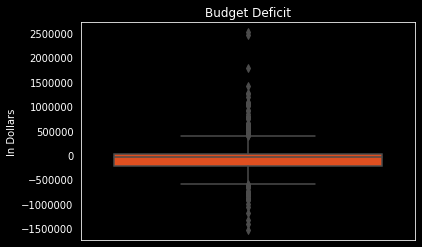

In [21]:
sns.boxplot(y=tot_exp_rev['BUDGET_DEFICIT'], color='#FF3F00')
plt.title('Budget Deficit')
plt.ylabel('In Dollars');

In [22]:
def tukeys_IQR(col):
  q25,q75 = np.percentile(col, [25,75])
  iqr = q75-q25

  for threshold in np.arange(1,5,0.5):
    min_val = q25 - (threshold*iqr)
    max_val = q75 +(threshold*iqr)
    print(f'The threshold is {threshold}')
    print(f'The number of outliers is {len(np.where((col > max_val)|(col < min_val))[0])}')
    print('-'*29)

print('Pre-Winsorized BUDGET DEFICIT Outliers:')
tukeys_IQR(tot_exp_rev['BUDGET_DEFICIT'])

Pre-Winsorized BUDGET DEFICIT Outliers:
The threshold is 1.0
The number of outliers is 151
-----------------------------
The threshold is 1.5
The number of outliers is 89
-----------------------------
The threshold is 2.0
The number of outliers is 62
-----------------------------
The threshold is 2.5
The number of outliers is 33
-----------------------------
The threshold is 3.0
The number of outliers is 24
-----------------------------
The threshold is 3.5
The number of outliers is 19
-----------------------------
The threshold is 4.0
The number of outliers is 15
-----------------------------
The threshold is 4.5
The number of outliers is 9
-----------------------------


Let's continue with winsorization as we will be comparing these methods in a moment:

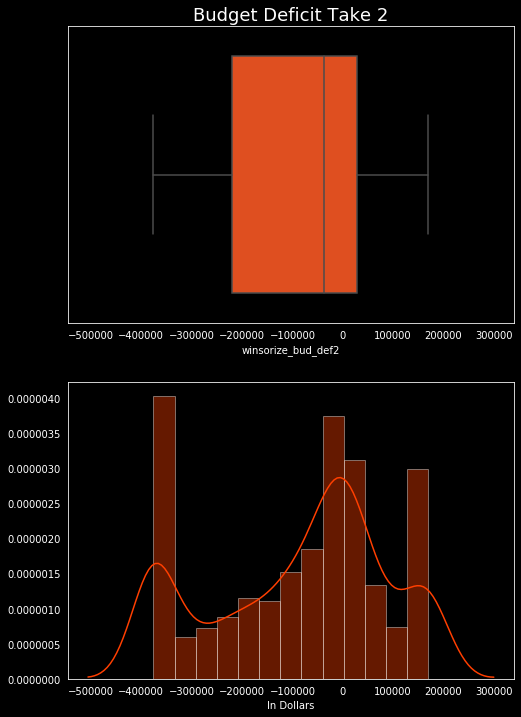

In [23]:
tot_exp_rev['winsorize_bud_def2'] = winsorize(tot_exp_rev['BUDGET_DEFICIT'], (0.10, 0.10))

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
ax = sns.boxplot(x=tot_exp_rev['winsorize_bud_def2'], color='#FF3F00')
plt.title('Budget Deficit Take 2', fontsize=18)
plt.xticks(ticks=None, labels=None)

plt.subplot(2,1,2, sharex=ax)
sns.distplot(tot_exp_rev['winsorize_bud_def2'], color='#FF3F00')
plt.xlabel('In Dollars');

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?


In [24]:
print(pd.concat([edu_df['BUDGET_DEFICIT'], edu_df['winsorize_bud_def'], tot_exp_rev['winsorize_bud_def2']], axis=1).describe())


       BUDGET_DEFICIT  winsorize_bud_def  winsorize_bud_def2
count    1.441000e+03        1441.000000         1441.000000
mean    -1.064494e+05      -69221.842179       -86712.728369
std      5.416848e+05      185841.942297       175027.981741
min     -5.487742e+06     -424389.000000      -375885.000000
25%     -1.892200e+05     -189220.000000      -219449.000000
50%     -2.955000e+04      -29550.000000       -38244.000000
75%      3.857600e+04       38576.000000        27840.000000
max      3.897129e+06      213822.000000       169900.000000


Almost all statistics of the two winsorized data sets vary dramatically. Most notable are the means, medians, and maxs.

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I think it makes most sense to handle the equations before handling outliers, so you are working with the original data in your calculations. Therefore, I would choose the method in the 3rd question.